**Importing The Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics

  **Data Collection and Preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the datasets

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Big Mart Sales/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Big Mart Sales/Test.csv')

In [ ]:
    train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1. Item_Identifier: Unique product ID

2. Item_Weight: Weight of product

3. Item_Fat_Content: Whether the product is low fat or not

4. Item_Visibility: The % of total display area of all products in a store allocated to the particular product

5. Item_Type: The category to which the product belongs

6. Item_MRP: Maximum Retail Price (list price) of the product

7. Outlet_Identifier: Unique store ID

8. Outlet_Establishment_Year: The year in which store was established

9. Outlet_Size: The size of the store in terms of ground area covered

10. Outlet_Location_Type: The type of city in which the store is located

11. Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

12. Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
# number of data points & number of features

train.shape

(8523, 12)

In [ ]:
# number of data points & number of features

test.shape

(5681, 11)

In [ ]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [ ]:
# getting some information about thye dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Categorical Features:**       
- Item_Identifier               
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

**Numericals Columns:**


*  Item_Weight
*  Item_Visibility	
*  Item_MRP	
*  Outlet_Establishment_Year
*  Item_Outlet_Sales





In [ ]:
# checking for missing values

train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# checking for missing values

test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

**Fill The Missing Values**

Numerical Column -> Mean (Average)

Categorical Column -> Mode (Most Repeated value)


In [ ]:
train['Item_Weight'].mean()

12.857645184136183

In [ ]:
test['Item_Weight'].mean()

12.695633368756374

In [ ]:
# filling the missing values in "Item_weight column" with "Mean" value

train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)

test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace=True)

In [ ]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
test['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

In [ ]:
# filling the missing values in "Outlet_Size" column with Mode

mode_of_train = train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

mode_of_test = test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [ ]:
mode_of_train

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
mode_of_test

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
miss_train = train['Outlet_Size'].isnull() 
miss_test = test['Outlet_Size'].isnull() 

In [ ]:
train.loc[miss_train, 'Outlet_Size'] = train.loc[miss_train,'Outlet_Type'].apply(lambda x: mode_of_train[x])
test.loc[miss_test, 'Outlet_Size'] = test.loc[miss_test,'Outlet_Type'].apply(lambda x: mode_of_test[x])

In [ ]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

**Data Preprocessing**

In [ ]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Now Low Fat, LF, low fat are having same meaning
# Similarly Regular, reg have same meaning

train.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}}, inplace=True)

test.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}}, inplace=True)

In [ ]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [ ]:
test_copy = test.copy()

In [ ]:
train_copy = train.copy()

**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
# It will change all Categorical features into numerical features

train['Item_Identifier'] = encoder.fit_transform(train['Item_Identifier'])
train['Item_Fat_Content'] = encoder.fit_transform(train['Item_Fat_Content'])
train['Item_Type'] = encoder.fit_transform(train['Item_Type'])
train['Outlet_Identifier'] = encoder.fit_transform(train['Outlet_Identifier'])
train['Outlet_Size'] = encoder.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = encoder.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type'] = encoder.fit_transform(train['Outlet_Type'])

In [ ]:
# It will change all Categorical features into numerical features

test['Item_Identifier'] = encoder.fit_transform(test['Item_Identifier'])
test['Item_Fat_Content'] = encoder.fit_transform(test['Item_Fat_Content'])
test['Item_Type'] = encoder.fit_transform(test['Item_Type'])
test['Outlet_Identifier'] = encoder.fit_transform(test['Outlet_Identifier'])
test['Outlet_Size'] = encoder.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type'] = encoder.fit_transform(test['Outlet_Location_Type'])
test['Outlet_Type'] = encoder.fit_transform(test['Outlet_Type'])

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


**Splitting features and Target**

In [ ]:
X = train.drop(columns='Item_Outlet_Sales', axis=1)
Y = train['Item_Outlet_Sales']

In [ ]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1


In [ ]:
Y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
# split into train test sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=10)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(6818, 11) (1705, 11) (6818,) (1705,)


**Machine Learning Models**

1.   XGBoost Regressor
2.   AdaBoost Regressor
3.   Linear Regression
4.   RandomForest Regressor




In [ ]:
# XGBoost Regressor Model

from xgboost import XGBRegressor

regressor = XGBRegressor()
model_1 = regressor.fit(X_train,Y_train)

[10:22:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# prediction on test data
regressor.predict(X_test)

array([4626.6704 , 1608.2018 , 3152.7153 , ...,  941.43713, 3273.4912 ,
       2656.9358 ], dtype=float32)

In [ ]:
# Accuracy of Model (hint: Multiply with 100)
metrics.r2_score(Y_test,regressor.predict(X_test))

0.6080514080175095

In [ ]:
# AdaBoost Regressor Model

from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor()
regressor.fit(X_train,Y_train)

AdaBoostRegressor()

In [ ]:
# prediction on test data
regressor.predict(X_test)

array([5049.38548321, 1788.86629017, 3707.10038631, ..., 1165.37019268,
       3707.22842246, 2252.66720388])

In [ ]:
# Accuracy of Model (hint: Multiply with 100)
metrics.r2_score(Y_test,regressor.predict(X_test))

0.5239482630809834

In [ ]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression

reressor = LinearRegression()
regressor.fit(X_train,Y_train)

AdaBoostRegressor()

In [ ]:
# prediction on test data
regressor.predict(X_test)

array([4992.35875051, 1896.20251623, 3861.40758913, ..., 1114.02356842,
       3984.48561524, 2567.08485972])

In [ ]:
# Accuracy of Model (hint: Multiply with 100)
metrics.r2_score(Y_test,regressor.predict(X_test))

0.5139778670572569

In [ ]:
# RandomForest Regression Model

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
# prediction on test data
regressor.predict(X_test)

array([4335.15696 , 1760.861234, 2418.545132, ...,  980.517002,
       3919.191752, 2865.33688 ])

In [ ]:
# Accuracy of Model (hint: Multiply with 100)
metrics.r2_score(Y_test,regressor.predict(X_test))

0.5618272531130554

**Prediction**

In [ ]:
# XGBoost Regressor have maximum accuracy
res = model_1.predict(test)
res

array([1675.9078 , 1378.9669 ,  583.20325, ..., 1846.4764 , 3760.0413 ,
       1262.4879 ], dtype=float32)

In [ ]:
# Converting res into DataFrame
df = pd.DataFrame(res)

In [ ]:
df.head()

,0
0,1675.907837
1,1378.966919
2,583.203247
3,2522.833252
4,5674.394531


In [ ]:
# Give them a column name
df.columns = ['Predicted_Sales']
df

,Predicted_Sales
0,1675.907837
1,1378.966919
2,583.203247
3,2522.833252
4,5674.394531
...,...
5676,2207.298828
5677,2458.035645
5678,1846.476440
5679,3760.041260


In [ ]:
# Join the predicted output and input column
file = test_copy.join(df)
file

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Predicted_Sales
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1675.907837
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,1378.966919
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,583.203247
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,2522.833252
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5674.394531
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2207.298828
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2458.035645
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,1846.476440
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,3760.041260


In [ ]:
# save the file 
file.to_csv("My_prediction.csv")

**Visulization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_copy.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<Figure size 576x432 with 0 Axes>

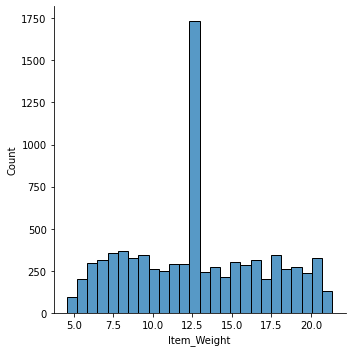

In [ ]:
# Item Weight Distribution

plt.figure(figsize=(8,6))
sns.displot(train_copy['Item_Weight'])
plt.show()

<Figure size 720x360 with 0 Axes>

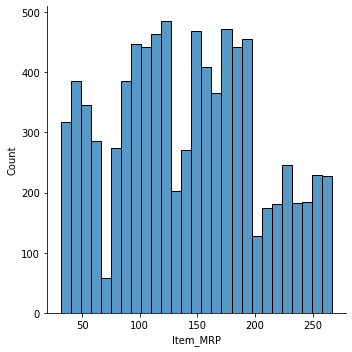

In [ ]:
# MRP Distribution Distribution

plt.figure(figsize=(10,5))
sns.displot(train_copy['Item_MRP'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


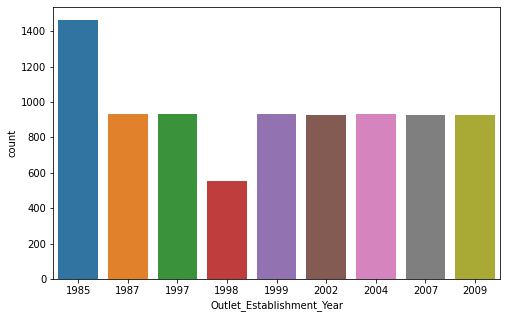

In [ ]:
# Outlet_Establishment_Year column

plt.figure(figsize=(8,5))
sns.countplot(train_copy['Outlet_Establishment_Year'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


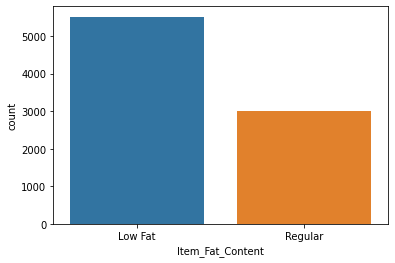

In [ ]:
# Item_Fat_Content column

sns.countplot(train_copy['Item_Fat_Content'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


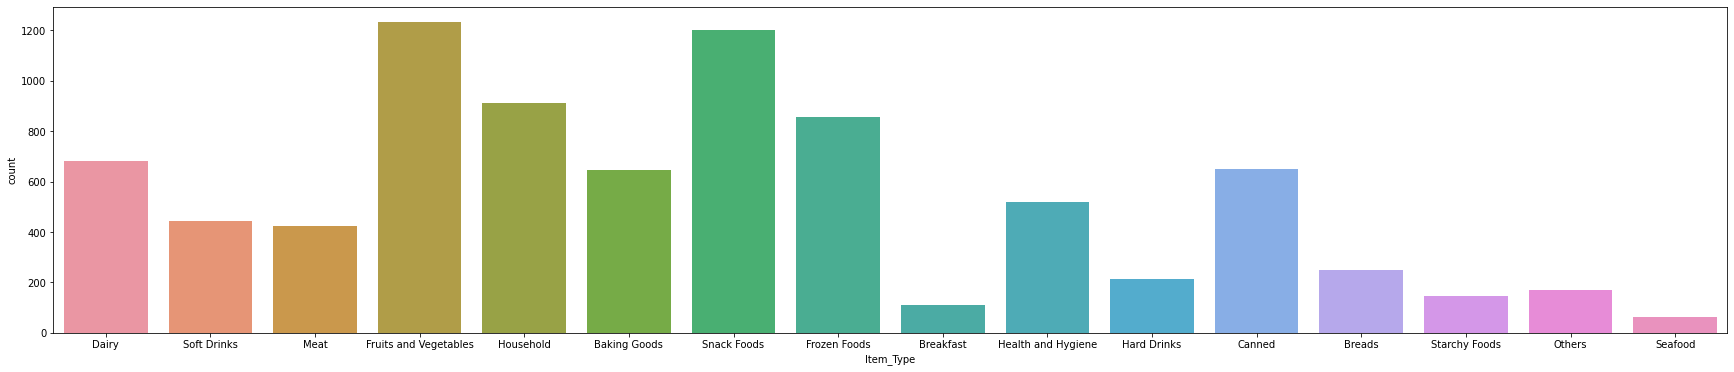

In [ ]:
# Item_Type column

plt.figure(figsize=(30,6))
sns.countplot(train_copy['Item_Type'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


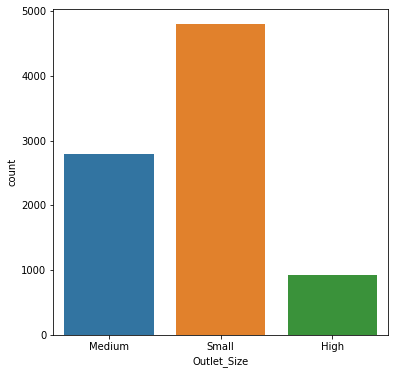

In [ ]:
# Outlet_Size column

plt.figure(figsize=(6,6))
sns.countplot(train_copy['Outlet_Size'])
plt.show()

**Visulization using Klib Library**

In [ ]:
import klib

ModuleNotFoundError: ignored

In [ ]:
klib.cat_plot(train_copy)

In [ ]:
klib.corr_mat(train_copy)

In [ ]:
klib.dist_plot(train_copy)

**Thank You**